# Experiment for Dataset2

Author: Xiaolong Liu & Kedong Chen

Created: Nov 20, 2023

In [1]:
import pandas as pd
import phase2_py_moudule as phase2
import minimize_objective as min_obj
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Split the dataset to training set and test set
dataset = phase2.CsvDataSet('framingham_modified.csv', frac_test=0.2, rand_seed=0, add_dummy_feature=False)

# Logistic Regression

In [3]:
prob = phase2.LogisticRegressionProblem(dataset)

LogisticRegressionObj has been created.
Number of features........: 15
Size of training set......: 2924
Size of test set..........: 732
Regularization parameter..: 0.000000



# Experiment

### The objective is to forecast the probability of a patient developing coronary heart disease (CHD) within the next 10 years, using various predictive factors. In this section, we employ a logistic regression model for CHD prediction and assess the effectiveness of different optimization algorithms. These include gradient descent with a constant step size, gradient descent with line search, and the Newton method with line search, enabling a comparison of their performance in this predictive task.

# For Experiment1 to 6, starting point is all 0 vector.

## Experiment1
### Gradient descent with constant, with step size = 0.01

In [4]:
options = min_obj.init_options()
options['step_type'] = 'gradient_descent'
options['output_level'] = 1
options['max_iter'] = 50000
options['linesearch'] = 'constant'
options['alpha_init'] = 0.01

status1, x_sol1, f_sol1, f_record1, norm_grad_record1 = min_obj.minimize(prob, options)
print("Accuracy of train set is")
print(prob.compute_accuracy_train(x_sol1))
print("Accuracy of test set is")
print(prob.compute_accuracy_test(x_sol1))

/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:365: RuntimeWarning: overflow encountered in exp
  exp_neg_yZx = np.exp(-1.0*yZx)
/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:377: RuntimeWarning: overflow encountered in exp
  exp_pos_yZx = np.exp(yZx)



Number of iterations............: 50000
Total number of objective functions evaluation............: 50000
Total number of gradient evaluation............: 50000
Total number of hessian evaluation............: 0
Final objective.................: 29.4218
||grad|| at final point.........: 38.6655
Status: Maximum number of iterations (50000) exceeded.
Accuracy of train set is
0.8430232558139535
Accuracy of test set is
0.8661202185792349


### The norm of gradient goes up and down, and the loss also shows same trend. But GD should not have this trend of loss.

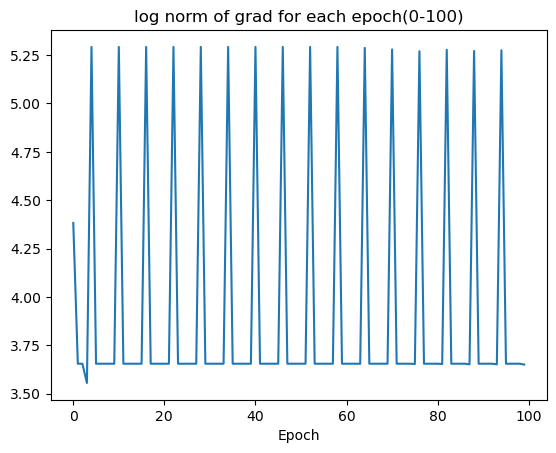

In [39]:
plt.plot(np.log(norm_grad_record1[0:100]))
plt.title("log norm of grad for each epoch(0-100)")
plt.xlabel("Epoch")
plt.show()

In [40]:
plt.plot(np.log(f_record1[0:100]))
plt.title("log loss for each epoch(0-100)")
plt.xlabel("Epoch")
plt.show()

## Experiment2
### Gradient descent with backtracking, with step size = 0.01

In [7]:
options = min_obj.init_options()
options['step_type'] = 'gradient_descent'
options['output_level'] = 1
options['max_iter'] = 50000
options['linesearch'] = 'backtracking'
options['alpha_init'] = 0.01

status2, x_sol2, f_sol2, f_record2, norm_grad_record2 = min_obj.minimize(prob, options)
print("Accuracy of train set is")
print(prob.compute_accuracy_train(x_sol2))
print("Accuracy of test set is")
print(prob.compute_accuracy_test(x_sol2))


Number of iterations............: 50000
Total number of objective functions evaluation............: 349169
Total number of gradient evaluation............: 50000
Total number of hessian evaluation............: 0
Final objective.................: 0.411865
||grad|| at final point.........: 0.0417666
Status: Maximum number of iterations (50000) exceeded.
Accuracy of train set is
0.844733242134063
Accuracy of test set is
0.860655737704918


### The norm of gradient also goes up and down, but the loss decresing which is very good.

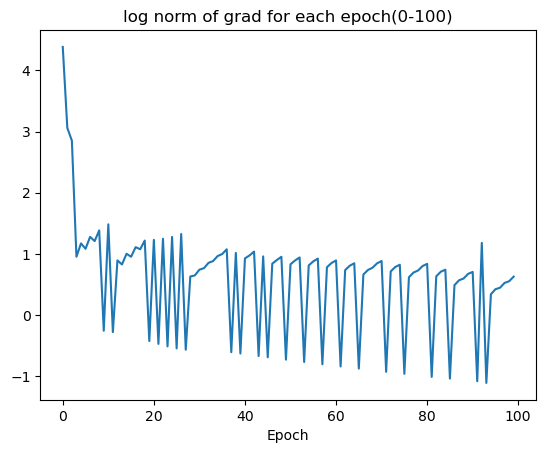

In [41]:
plt.plot(np.log(norm_grad_record2[0:100]))
plt.title("log norm of grad for each epoch(0-100)")
plt.xlabel("Epoch")
plt.show()

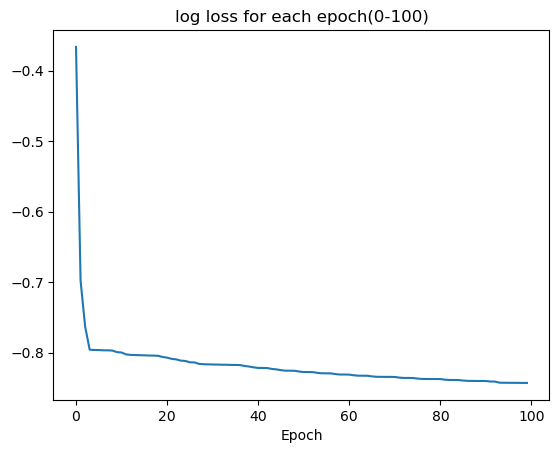

In [42]:
plt.plot(np.log(f_record2[0:100]))
plt.title("log loss for each epoch(0-100)")
plt.xlabel("Epoch")
plt.show()

### Despite reaching the maximum number of iterations, it's noteworthy that the final objective value and the norm of the gradient are significantly smaller compared to the gradient descent with a constant step size of 0.01. Additionally, the number of objective function evaluations is approximately seven times higher than that observed in gradient descent with a constant step size. This is attributable to the backtracking line search process, where the algorithm compares the objective value before and after each step to adjust the step size appropriately, ensuring a consistent decrease in the final objective value.

## Experiment3
### Gradient descent with constant, with step size = 0.0001

In [10]:
options = min_obj.init_options()
options['step_type'] = 'gradient_descent'
options['output_level'] = 1
options['max_iter'] = 50000
options['linesearch'] = 'constant'
options['alpha_init'] = 0.0001

status3, x_sol3, f_sol3, f_record3, norm_grad_record3 = min_obj.minimize(prob, options)
print("Accuracy of train set is")
print(prob.compute_accuracy_train(x_sol3))
print("Accuracy of test set is")
print(prob.compute_accuracy_test(x_sol3))


Number of iterations............: 50000
Total number of objective functions evaluation............: 50000
Total number of gradient evaluation............: 50000
Total number of hessian evaluation............: 0
Final objective.................: 0.41378
||grad|| at final point.........: 0.0175881
Status: Maximum number of iterations (50000) exceeded.
Accuracy of train set is
0.8450752393980848
Accuracy of test set is
0.8620218579234973


### After using a very small step size, the norm of grad versus iteration can be stable and loss decresing as we expected.

In [11]:
plt.plot(np.log(norm_grad_record3))
plt.title("log norm of grad for each epoch")
plt.xlabel("Epoch")
plt.show()

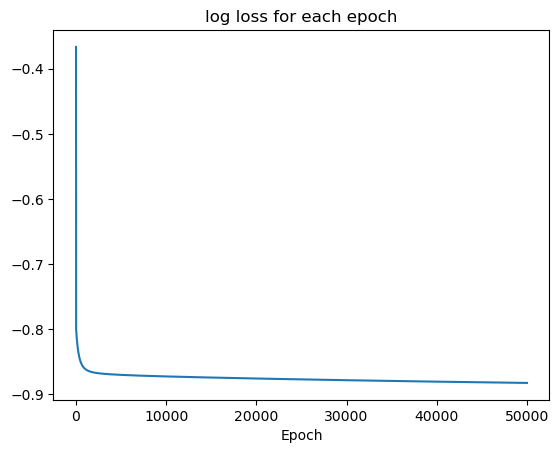

In [12]:
plt.plot(np.log(f_record3))
plt.title("log loss for each epoch")
plt.xlabel("Epoch")
plt.show()

## Experiment4
### Gradient descent with backtracking, with step size = 0.001

In [13]:
options = min_obj.init_options()
options['step_type'] = 'gradient_descent'
options['output_level'] = 1
options['max_iter'] = 50000
options['linesearch'] = 'backtracking'
options['alpha_init'] = 0.001

status4, x_sol4, f_sol4, f_record4, norm_grad_record4 = min_obj.minimize(prob, options)
print("Accuracy of train set is")
print(prob.compute_accuracy_train(x_sol4))
print("Accuracy of test set is")
print(prob.compute_accuracy_test(x_sol4))


Number of iterations............: 50000
Total number of objective functions evaluation............: 179748
Total number of gradient evaluation............: 50000
Total number of hessian evaluation............: 0
Final objective.................: 0.411482
||grad|| at final point.........: 0.0354467
Status: Maximum number of iterations (50000) exceeded.
Accuracy of train set is
0.844733242134063
Accuracy of test set is
0.8620218579234973


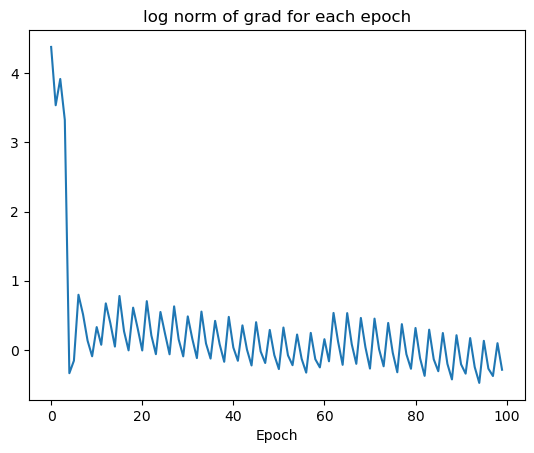

In [14]:
plt.plot(np.log(norm_grad_record4[0:100]))
plt.title("log norm of grad for each epoch")
plt.xlabel("Epoch")
plt.show()

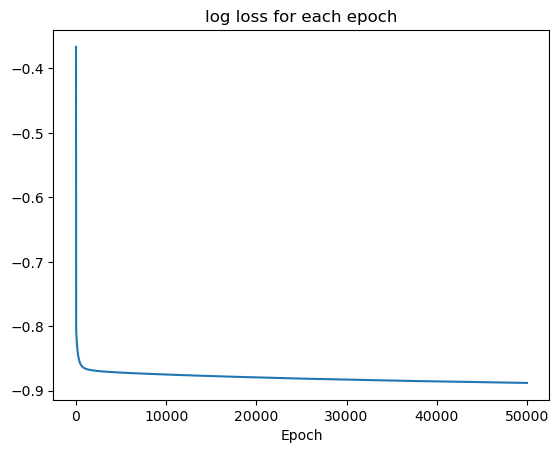

In [15]:
plt.plot(np.log(f_record4))
plt.title("log loss for each epoch")
plt.xlabel("Epoch")
plt.show()

## Experiment5
### Gradient descent with backtracking, with step size = 0.0001

In [16]:
options = min_obj.init_options()
options['step_type'] = 'gradient_descent'
options['output_level'] = 1
options['max_iter'] = 50000
options['linesearch'] = 'backtracking'
options['alpha_init'] = 0.0001

status5, x_sol5, f_sol5, f_record5, norm_grad_record5 = min_obj.minimize(prob, options)
print("Accuracy of train set is")
print(prob.compute_accuracy_train(x_sol5))
print("Accuracy of test set is")
print(prob.compute_accuracy_test(x_sol5))


Number of iterations............: 50000
Total number of objective functions evaluation............: 50000
Total number of gradient evaluation............: 50000
Total number of hessian evaluation............: 0
Final objective.................: 0.41378
||grad|| at final point.........: 0.0175881
Status: Maximum number of iterations (50000) exceeded.
Accuracy of train set is
0.8450752393980848
Accuracy of test set is
0.8620218579234973


### After using a very small step size, the norm of grad versus iteration can be stable and loss decresing as we expected.

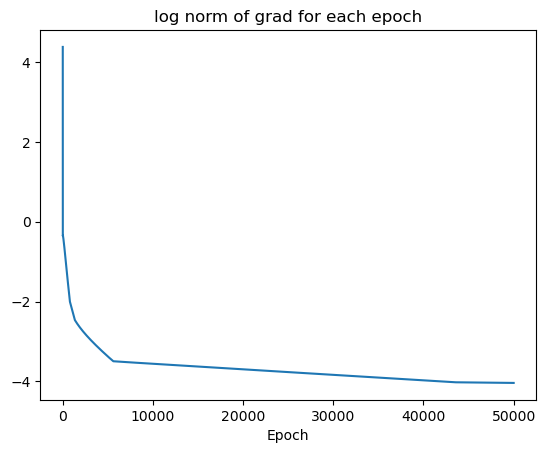

In [17]:
plt.plot(np.log(norm_grad_record5))
plt.title("log norm of grad for each epoch")
plt.xlabel("Epoch")
plt.show()

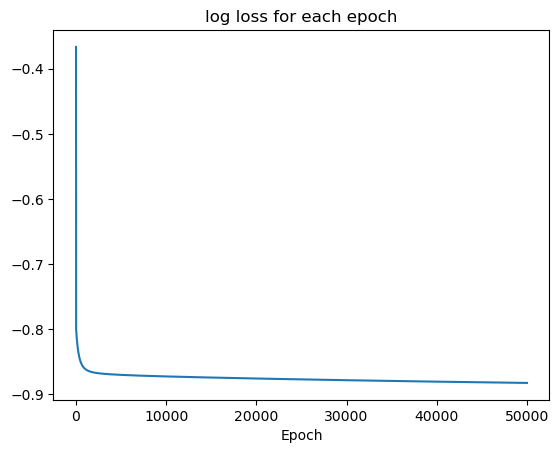

In [18]:
plt.plot(np.log(f_record5))
plt.title("log loss for each epoch")
plt.xlabel("Epoch")
plt.show()

## Experiment6
### Newton method with backtracking

In [19]:
options = min_obj.init_options()
options['step_type'] = 'Newton'
options['output_level'] = 1
options['max_iter'] = 50000
options['linesearch'] = 'backtracking'
options['alpha_init'] = 1

status6, x_sol6, f_sol6, f_record6, norm_grad_record6 = min_obj.minimize(prob, options)
print("Accuracy of train set is")
print(prob.compute_accuracy_train(x_sol6))
print("Accuracy of test set is")
print(prob.compute_accuracy_test(x_sol6))


Number of iterations............: 6
Total number of objective functions evaluation............: 6
Total number of gradient evaluation............: 6
Total number of hessian evaluation............: 6
Final objective.................: 0.400355
||grad|| at final point.........: 4.42701e-15
Status: Critical point found.
Accuracy of train set is
0.8467852257181943
Accuracy of test set is
0.860655737704918


### Newton method converges very fast and the loss decresing fast.

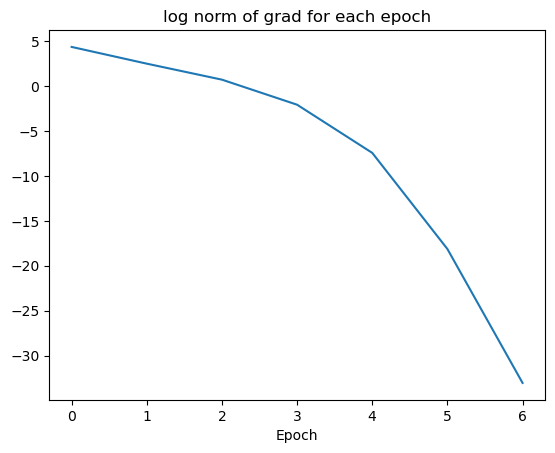

In [20]:
plt.plot(np.log(norm_grad_record6))
plt.title("log norm of grad for each epoch")
plt.xlabel("Epoch")
plt.show()

In [21]:
plt.plot(np.log(f_record6))
plt.title("log loss for each epoch")
plt.xlabel("Epoch")
plt.show()

## Experiment7
### Newton method with backtracking, but choose starting point as all entries = 0.01, it fails

In [22]:
dim = x_sol6.shape
x_start = 0.01*np.ones(dim)

options = min_obj.init_options()
options['step_type'] = 'Newton'
options['output_level'] = 2
options['max_iter'] = 50000
options['linesearch'] = 'backtracking'
options['alpha_init'] = 1

status7, x_sol7, f_sol7, f_record7, norm_grad_record7 = min_obj.minimize(prob, options, x_start=x_start)
print("Accuracy of train set is")
print(prob.compute_accuracy_train(x_sol7))
print("Accuracy of test set is")
print(prob.compute_accuracy_test(x_sol7))

  iter                       f   ||d_k||     alpha    # func    # grad # hessian    pertub  ||grad||
     0  5.8303199126066945e+00  0.00e+00  0.00e+00         0         0         0  0.00e+00  1.98e+02
     1  4.2597540053632201e+00  7.24e+02  3.12e-02         6         1         1  0.00e+00  3.63e+01
     2                     inf  2.97e+10  9.54e-07        20         1         1  0.00e+00  2.84e+01


/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:365: RuntimeWarning: overflow encountered in exp
  exp_neg_yZx = np.exp(-1.0*yZx)
/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:377: RuntimeWarning: overflow encountered in exp
  exp_pos_yZx = np.exp(yZx)
/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:388: RuntimeWarning: overflow encountered in exp
  exp_pos_yZx = np.exp(yZx)
/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:389: RuntimeWarning: invalid value encountered in true_divide
  diag = exp_pos_yZx/((1.+exp_pos_yZx)**2)/self._N_train


ValueError: array must not contain infs or NaNs

## Experiment8
### Newton method with backtracking, but choose starting point as all entries = 100, it fails

In [43]:
dim = x_sol6.shape
x_start = 100*np.ones(dim)

options = min_obj.init_options()
options['step_type'] = 'Newton'
options['output_level'] = 2
options['max_iter'] = 50000
options['linesearch'] = 'backtracking'
options['alpha_init'] = 1

status8, x_sol8, f_sol8, f_record8, norm_grad_record8 = min_obj.minimize(prob, options, x_start=x_start)
print("Accuracy of train set is")
print(prob.compute_accuracy_train(x_sol8))
print("Accuracy of test set is")
print(prob.compute_accuracy_test(x_sol8))

  iter                       f   ||d_k||     alpha    # func    # grad # hessian    pertub  ||grad||
     0                     inf  0.00e+00  0.00e+00         0         0         0  0.00e+00  1.99e+02


/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:365: RuntimeWarning: overflow encountered in exp
  exp_neg_yZx = np.exp(-1.0*yZx)
/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:377: RuntimeWarning: overflow encountered in exp
  exp_pos_yZx = np.exp(yZx)
/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:388: RuntimeWarning: overflow encountered in exp
  exp_pos_yZx = np.exp(yZx)
/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:389: RuntimeWarning: invalid value encountered in true_divide
  diag = exp_pos_yZx/((1.+exp_pos_yZx)**2)/self._N_train


ValueError: array must not contain infs or NaNs

## Experiment9
### Newton method with backtracking, but choose starting point as all entries = 0.01, and alpha_init = 0.001, it finds critical points but very slow.

In [24]:
dim = x_sol6.shape
x_start = 0.01*np.ones(dim)

options = min_obj.init_options()
options['step_type'] = 'Newton'
options['output_level'] = 1
options['max_iter'] = 50000
options['linesearch'] = 'backtracking'
options['alpha_init'] = 0.001

status9, x_sol9, f_sol9, f_record9, norm_grad_record9 = min_obj.minimize(prob, options, x_start=x_start)
print("Accuracy of train set is")
print(prob.compute_accuracy_train(x_sol9))
print("Accuracy of test set is")
print(prob.compute_accuracy_test(x_sol9))


Number of iterations............: 27044
Total number of objective functions evaluation............: 39527
Total number of gradient evaluation............: 27044
Total number of hessian evaluation............: 27044
Final objective.................: 0.400355
||grad|| at final point.........: 9.9958e-09
Status: Critical point found.
Accuracy of train set is
0.8467852257181943
Accuracy of test set is
0.860655737704918


In [25]:
plt.plot(np.log(norm_grad_record9))
plt.title("log norm of grad for each epoch")
plt.xlabel("Epoch")
plt.show()

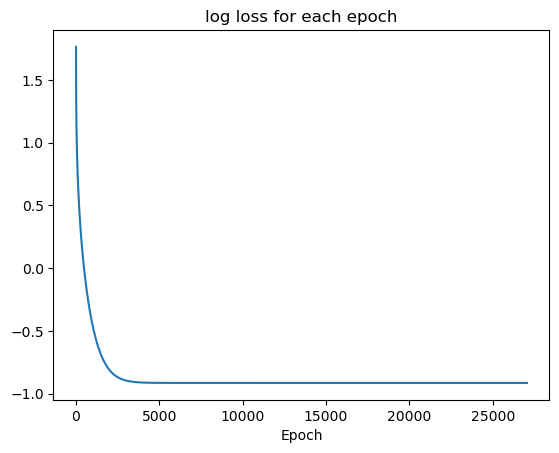

In [26]:
plt.plot(np.log(f_record9))
plt.title("log loss for each epoch")
plt.xlabel("Epoch")
plt.show()

## Experiment10
### Gradient descent with constant, with step size = 0.01, starting point all 0.01

In [27]:
dim = x_sol6.shape
x_start = 0.01*np.ones(dim)

options = min_obj.init_options()
options['step_type'] = 'gradient_descent'
options['output_level'] = 1
options['max_iter'] = 50000
options['linesearch'] = 'constant'
options['alpha_init'] = 0.01

status10, x_sol10, f_sol10, f_record10, norm_grad_record10 = min_obj.minimize(prob, options, x_start=x_start)
print("Accuracy of train set is")
print(prob.compute_accuracy_train(x_sol10))
print("Accuracy of test set is")
print(prob.compute_accuracy_test(x_sol10))

/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:365: RuntimeWarning: overflow encountered in exp
  exp_neg_yZx = np.exp(-1.0*yZx)
/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:377: RuntimeWarning: overflow encountered in exp
  exp_pos_yZx = np.exp(yZx)



Number of iterations............: 50000
Total number of objective functions evaluation............: 50000
Total number of gradient evaluation............: 50000
Total number of hessian evaluation............: 0
Final objective.................: 23.9872
||grad|| at final point.........: 38.6655
Status: Maximum number of iterations (50000) exceeded.
Accuracy of train set is
0.8430232558139535
Accuracy of test set is
0.8661202185792349


### It performs bad.

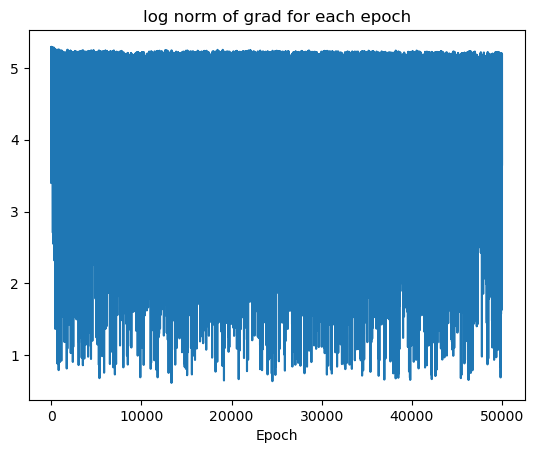

In [28]:
plt.plot(np.log(norm_grad_record10))
plt.title("log norm of grad for each epoch")
plt.xlabel("Epoch")
plt.show()

In [29]:
plt.plot(np.log(f_record10))
plt.title("log loss for each epoch")
plt.xlabel("Epoch")
plt.show()

In [44]:
dim = x_sol6.shape
x_start = 0.01*np.ones(dim)

options = min_obj.init_options()
options['step_type'] = 'gradient_descent'
options['output_level'] = 1
options['max_iter'] = 50000
options['linesearch'] = 'constant'
options['alpha_init'] = 0.0001

status10, x_sol10, f_sol10, f_record10, norm_grad_record10 = min_obj.minimize(prob, options, x_start=x_start)
print("Accuracy of train set is")
print(prob.compute_accuracy_train(x_sol10))
print("Accuracy of test set is")
print(prob.compute_accuracy_test(x_sol10))


Number of iterations............: 50000
Total number of objective functions evaluation............: 50000
Total number of gradient evaluation............: 50000
Total number of hessian evaluation............: 0
Final objective.................: 0.413561
||grad|| at final point.........: 0.017441
Status: Maximum number of iterations (50000) exceeded.
Accuracy of train set is
0.8450752393980848
Accuracy of test set is
0.8620218579234973


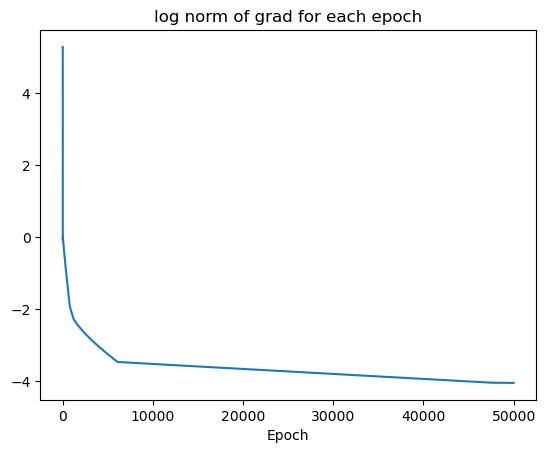

In [45]:
plt.plot(np.log(norm_grad_record10))
plt.title("log norm of grad for each epoch")
plt.xlabel("Epoch")
plt.show()

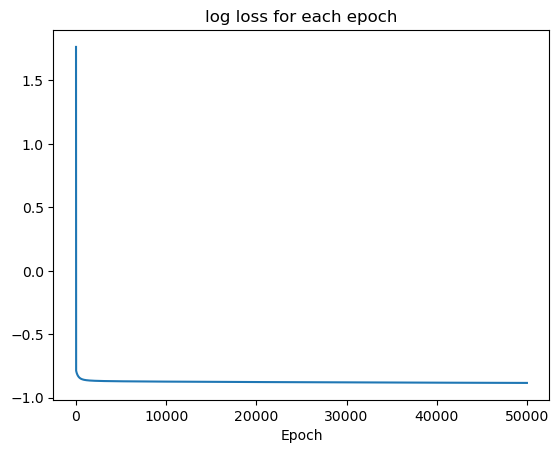

In [46]:
plt.plot(np.log(f_record10))
plt.title("log loss for each epoch")
plt.xlabel("Epoch")
plt.show()

## Experiment11
### Gradient descent with backtracking, with step size = 0.01, starting point all 0.01

In [30]:
dim = x_sol6.shape
x_start = 0.01*np.ones(dim)

options = min_obj.init_options()
options['step_type'] = 'gradient_descent'
options['output_level'] = 1
options['max_iter'] = 50000
options['linesearch'] = 'backtracking'
options['alpha_init'] = 0.01

status10, x_sol11, f_sol11, f_record11, norm_grad_record11 = min_obj.minimize(prob, options, x_start=x_start)
print("Accuracy of train set is")
print(prob.compute_accuracy_train(x_sol11))
print("Accuracy of test set is")
print(prob.compute_accuracy_test(x_sol11))

/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:365: RuntimeWarning: overflow encountered in exp
  exp_neg_yZx = np.exp(-1.0*yZx)



Number of iterations............: 50000
Total number of objective functions evaluation............: 349200
Total number of gradient evaluation............: 50000
Total number of hessian evaluation............: 0
Final objective.................: 0.411643
||grad|| at final point.........: 0.0342586
Status: Maximum number of iterations (50000) exceeded.
Accuracy of train set is
0.844733242134063
Accuracy of test set is
0.8620218579234973


### Although it didn't converge, it performs good.

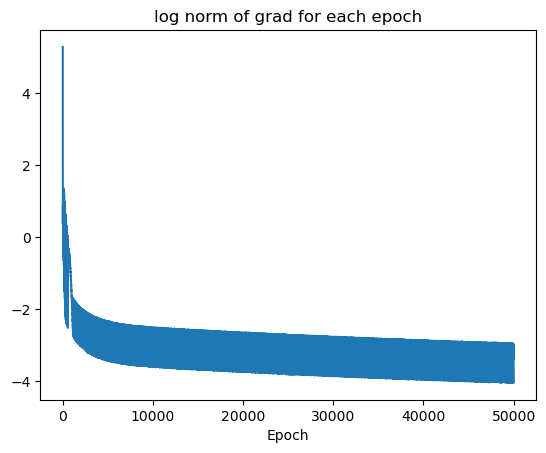

In [31]:
plt.plot(np.log(norm_grad_record11))
plt.title("log norm of grad for each epoch")
plt.xlabel("Epoch")
plt.show()

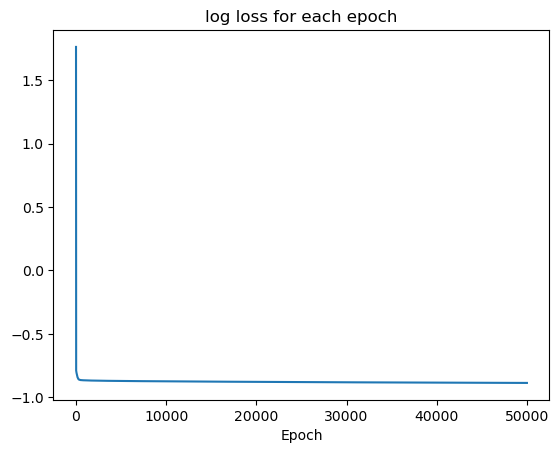

In [32]:
plt.plot(np.log(f_record11))
plt.title("log loss for each epoch")
plt.xlabel("Epoch")
plt.show()

## Experiment12
### Gradient descent with constant, with step size = 0.01, starting point all 100

In [33]:
dim = x_sol6.shape
x_start = 100*np.ones(dim)

options = min_obj.init_options()
options['step_type'] = 'gradient_descent'
options['output_level'] = 1
options['max_iter'] = 50000
options['linesearch'] = 'constant'
options['alpha_init'] = 0.01

status12, x_sol12, f_sol12, f_record12, norm_grad_record12 = min_obj.minimize(prob, options, x_start=x_start)
print("Accuracy of train set is")
print(prob.compute_accuracy_train(x_sol12))
print("Accuracy of test set is")
print(prob.compute_accuracy_test(x_sol12))

/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:365: RuntimeWarning: overflow encountered in exp
  exp_neg_yZx = np.exp(-1.0*yZx)
/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:377: RuntimeWarning: overflow encountered in exp
  exp_pos_yZx = np.exp(yZx)



Number of iterations............: 50000
Total number of objective functions evaluation............: 50000
Total number of gradient evaluation............: 50000
Total number of hessian evaluation............: 0
Final objective.................: 34.7577
||grad|| at final point.........: 38.3526
Status: Maximum number of iterations (50000) exceeded.
Accuracy of train set is
0.8430232558139535
Accuracy of test set is
0.8633879781420765


### It performs bad.

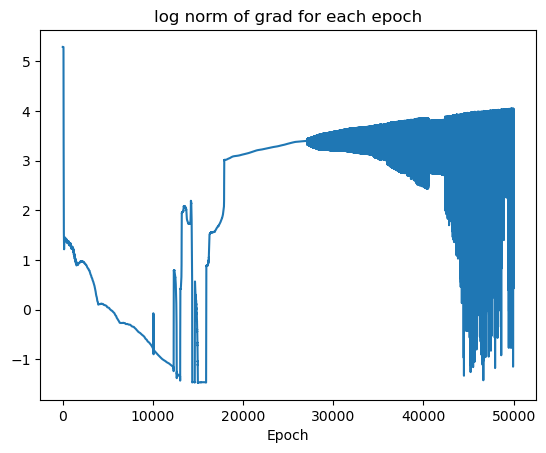

In [34]:
plt.plot(np.log(norm_grad_record12))
plt.title("log norm of grad for each epoch")
plt.xlabel("Epoch")
plt.show()

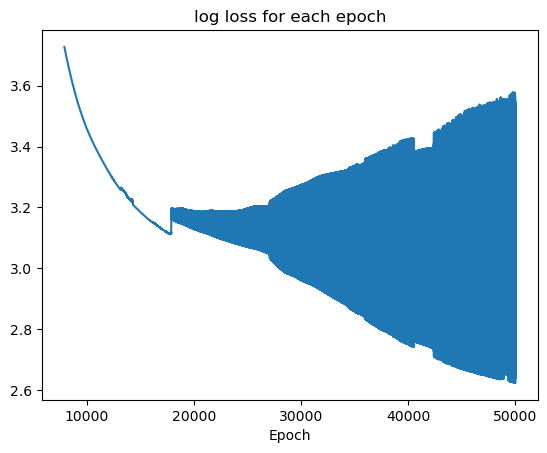

In [35]:
plt.plot(np.log(f_record12))
plt.title("log loss for each epoch")
plt.xlabel("Epoch")
plt.show()

## Experiment13
### Gradient descent with backtracking, with step size = 0.01, starting point all 100

In [36]:
dim = x_sol6.shape
x_start = 100*np.ones(dim)

options = min_obj.init_options()
options['step_type'] = 'gradient_descent'
options['output_level'] = 1
options['max_iter'] = 200000
options['linesearch'] = 'backtracking'
options['alpha_init'] = 0.01

status13, x_sol13, f_sol13, f_record13, norm_grad_record13 = min_obj.minimize(prob, options, x_start=x_start)
print("Accuracy of train set is")
print(prob.compute_accuracy_train(x_sol13))
print("Accuracy of test set is")
print(prob.compute_accuracy_test(x_sol13))

/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:365: RuntimeWarning: overflow encountered in exp
  exp_neg_yZx = np.exp(-1.0*yZx)
/Users/always/Documents/Northwestern University/2023Fall/IEMS 351 Optimization Methods in Data Science /project/Final/dataset2/phase2_py_moudule.py:377: RuntimeWarning: overflow encountered in exp
  exp_pos_yZx = np.exp(yZx)



Number of iterations............: 200000
Total number of objective functions evaluation............: 369275
Total number of gradient evaluation............: 200000
Total number of hessian evaluation............: 0
Final objective.................: 9.26501
||grad|| at final point.........: 0.110978
Status: Maximum number of iterations (200000) exceeded.
Accuracy of train set is
0.7766757865937073
Accuracy of test set is
0.7704918032786885


### Although the norm of gradient still wierd, the loss performs good.

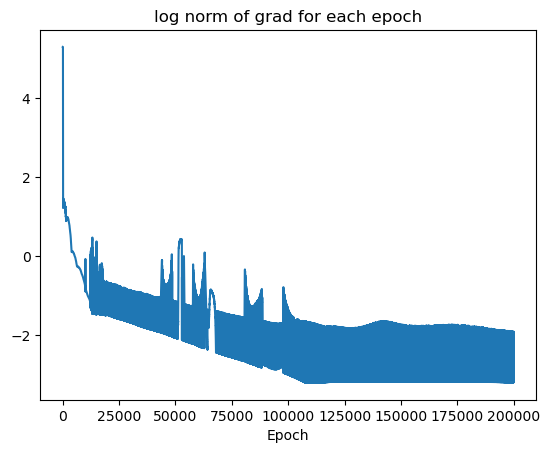

In [37]:
plt.plot(np.log(norm_grad_record13))
plt.title("log norm of grad for each epoch")
plt.xlabel("Epoch")
plt.show()

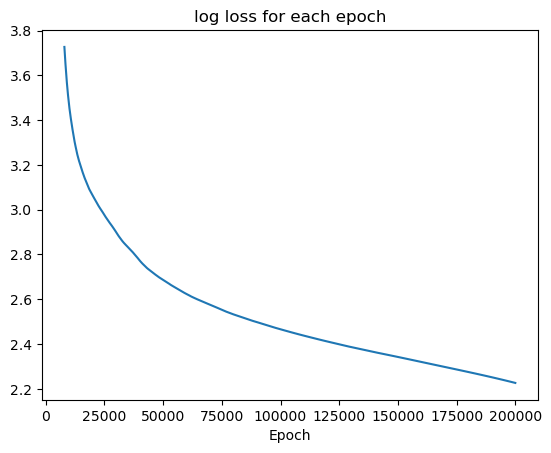

In [38]:
plt.plot(np.log(f_record13))
plt.title("log loss for each epoch")
plt.xlabel("Epoch")
plt.show()

# Summary
### In gradient descent with a constant step size, the function's sensitivity necessitates a small step size to avoid unstable oscillations in loss and gradient norm.
### While gradient descent with backtracking line search ensures a steady loss reduction, arbitrary step sizes can inflate computational requirements, as demonstrated by the varying function evaluations needed in different experiments.
### Both constant step size gradient descent and backtracking line search find satisfactory solutions but don't converge within set limits. In contrast, the Newton method with line search converges quickly, needing only 6 iterations.
### The Newton method faces challenges, particularly in computational cost due to the need for Hessian matrix calculations and the complexities of handling non-positive definite matrices.
### The Newton method demonstrates notable sensitivity to initial conditions, often resulting in divergence. On the other hand, gradient descent methods show greater adaptability to varied starting points, though their convergence is typically slower. Specifically, for Gradient Descent (GD) with a constant step size, careful selection of a smaller step size is crucial. In contrast, GD with backtracking doesn't necessitate such precise step size selection, but this flexibility may lead to an increased number of evaluations during line search.

# Thanks for reading!